<a href="https://colab.research.google.com/github/RIDDHIOZA25/25_DYNAMIC_CODERS_CRESCENDO_2K22/blob/main/FINAL-Copy_of_Copy_of_Copy_of_Crescendo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install anvil-uplink

     |████████████████████████████████| 64 kB 2.9 MB/s 
     |████████████████████████████████| 51 kB 219 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=0c9009047316c347468e87fc7b03b035be4d94899cdbfa29a9bd8d513efa2ad7
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


In [ ]:
!pip install pulp

     |████████████████████████████████| 14.2 MB 4.7 MB/s 


In [ ]:
from pulp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [ ]:
#a handful of sites
sites = ['Barcelona','Belgrade','Berlin','Brussels','Bucharest','Budapest','Copenhagen','Dublin','Hamburg','Istanbul','Kiev','London','Madrid','Milan','Moscow','Munich','Paris','Prague','Rome','Saint Petersburg','Sofia','Stockholm','Vienna','Warsaw']
# sites = ['Barcelona','Belgrade','Berlin','Brussels','Bucharest','Budapest','Copenhagen']
latlng = ['latitude', 'longitude']
position = pd.read_csv('position.csv', index_col="City")
flighttime = pd.read_csv('flight_time.csv', index_col="City")
distance = pd.read_csv('distance.csv', index_col="City")
# position.head(5)
# print(len(sites))

In [ ]:
#make some positions (so we can plot this)
positions = dict( ( city, (position.loc[city, 'longitude'], position.loc[city, 'latitude']) ) for city in sites)

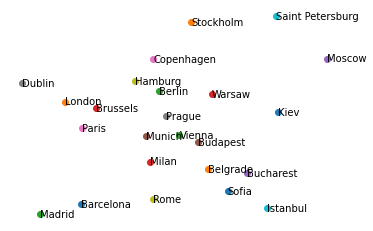

In [ ]:
for s in positions:
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')
    
plt.gca().axis('off');

In [ ]:
# get distanc between cities
distances = dict( ((s1,s2), distance.loc[s1, s2]) for s1 in positions for s2 in positions if s1!=s2)

In [ ]:
print(distances)

{('Barcelona', 'Belgrade'): 1528.13, ('Barcelona', 'Berlin'): 1497.61, ('Barcelona', 'Brussels'): 1062.89, ('Barcelona', 'Bucharest'): 1968.42, ('Barcelona', 'Budapest'): 1498.79, ('Barcelona', 'Copenhagen'): 1757.54, ('Barcelona', 'Dublin'): 1469.29, ('Barcelona', 'Hamburg'): 1471.78, ('Barcelona', 'Istanbul'): 2230.42, ('Barcelona', 'Kiev'): 2391.06, ('Barcelona', 'London'): 1137.67, ('Barcelona', 'Madrid'): 504.64, ('Barcelona', 'Milan'): 725.12, ('Barcelona', 'Moscow'): 3006.93, ('Barcelona', 'Munich'): 1054.55, ('Barcelona', 'Paris'): 831.59, ('Barcelona', 'Prague'): 1353.9, ('Barcelona', 'Rome'): 856.69, ('Barcelona', 'Saint Petersburg'): 2813.02, ('Barcelona', 'Sofia'): 1745.55, ('Barcelona', 'Stockholm'): 2276.51, ('Barcelona', 'Vienna'): 1347.43, ('Barcelona', 'Warsaw'): 1862.33, ('Belgrade', 'Barcelona'): 1528.13, ('Belgrade', 'Berlin'): 999.25, ('Belgrade', 'Brussels'): 1372.59, ('Belgrade', 'Bucharest'): 447.34, ('Belgrade', 'Budapest'): 316.41, ('Belgrade', 'Copenhagen'): 

In [ ]:
K = 3 #the number of vehicles 

In [ ]:
#create the problem
prob=LpProblem("vehicle", LpMinimize)

In [ ]:
#indicator variable if site i is connected to site j in the tour
x = LpVariable.dicts('x',distances, 0,1,LpBinary)
#dummy vars to eliminate subtours
u = LpVariable.dicts('u', sites, 0, len(sites)-1, LpInteger)

In [ ]:
#the objective
cost = lpSum([x[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [121]:
start_location = sites[int(input("Enter start location (departure) 1-23: "))] # start

Enter start location (departure) 1-23: 4


In [122]:
start_location

'Bucharest'

In [ ]:
#constraints
for k in sites:
    cap = 1 if k != start_location else K
    #inbound connection
    prob+= lpSum([ x[(i,k)] for i in sites if (i,k) in x]) ==cap
    #outbound connection
    prob+=lpSum([ x[(k,i)] for i in sites if (k,i) in x]) ==cap
    
#subtour elimination
N=len(sites)/K
for i in sites:
    for j in sites:
        if i != j and (i != start_location and j!= start_location) and (i,j) in x:
            prob += u[i] - u[j] <= (N)*(1-x[(i,j)]) - 1

In [ ]:
non_zero_edges = [ e for e in x if value(x[e]) != 0 ]

# def get_next_site(parent):
#     '''helper function to get the next edge'''
#     edges = [e for e in non_zero_edges if e[0]==parent]
#     for e in edges:
#         non_zero_edges.remove(e)
#     return edges

def get_next_site(parent):
    '''helper function to get the next edge'''
    edges = [e for e in non_zero_edges if e[0]==parent]
    for e in edges:
        non_zero_edges.remove(e)
    return edges

tours = get_next_site(start_location)

In [ ]:
tours

[('Madrid', 'Barcelona'),
 ('Madrid', 'Belgrade'),
 ('Madrid', 'Berlin'),
 ('Madrid', 'Brussels'),
 ('Madrid', 'Bucharest'),
 ('Madrid', 'Budapest'),
 ('Madrid', 'Copenhagen'),
 ('Madrid', 'Dublin'),
 ('Madrid', 'Hamburg'),
 ('Madrid', 'Istanbul'),
 ('Madrid', 'Kiev'),
 ('Madrid', 'London'),
 ('Madrid', 'Milan'),
 ('Madrid', 'Moscow'),
 ('Madrid', 'Munich'),
 ('Madrid', 'Paris'),
 ('Madrid', 'Prague'),
 ('Madrid', 'Rome'),
 ('Madrid', 'Saint Petersburg'),
 ('Madrid', 'Sofia'),
 ('Madrid', 'Stockholm'),
 ('Madrid', 'Vienna'),
 ('Madrid', 'Warsaw')]

In [ ]:
tours = [ [e] for e in tours ]

for t in tours:
    while t[0][0] !=start_location:
        t.append(get_next_site(t[0][1])[0])

In [115]:
user_location = int(input("Enter the desired location(1 - 23)")) # destination

Enter the desired location(1 - 23)1


In [116]:
print(' -> '.join([ b for a,b in tours[user_location - 1]]+[start_location]))
# print(' -> '.join([tours[user_location-1]]+['Berlin']))

Barcelona -> Madrid


In [117]:
totalTime = 0;
import random
climate_issues = input("climate issues? ")
climate_factor = 0
if climate_issues == "y":
  severity = int(input("Severity? 5-20 "))
  climate_issues = random.randint(5,severity)
elif climate_issues == "n":
  climate_issues = 0
  print("You are set to go!!!")
  
  
for t in tours:
    time = 0
    for i in range(0, len(t)):
        time += flighttime.loc[t[i][0], t[i][1]] + climate_issues
#         print(flighttime.loc[t[i][0], t[i][1]])
#     print(time)
    if time > totalTime:
        totalTime = time
print(totalTime)

climate issues? y
Severity? 5-20 5
578


In [118]:
# print(distance[tours[user_location-1]])
import pandas as pd
df = pd.DataFrame(distance)
total_distance = df.iat[user_location-1 , 2]
print(total_distance)

1497.61


In [128]:
destination = tours[user_location-1][0][1]
destination

'Barcelona'

In [129]:
tours[user_location]
destination

'Barcelona'

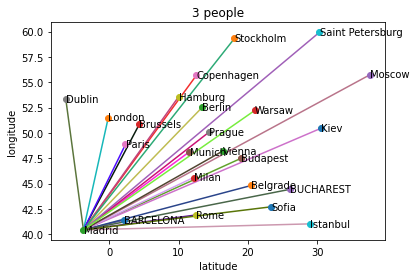

In [130]:
#draw the tours
colors = [np.random.rand(3) for i in range(len(tours))]
for t,c in zip(tours,colors):
    for a,b in t:
        p1,p2 = positions[a], positions[b]
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]], color=c)

#draw the map again
for s in positions:
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    if s==start_location or s==destination:
      plt.text(p[0]+.01,p[1],s.upper(),horizontalalignment='left',verticalalignment='center')
    else:
      plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')
    
plt.title('%d '%K + 'people' if K > 1 else 'person')
plt.xlabel('latitude')
plt.ylabel('longitude')
# plt.gca().axis('off')
plt.show()

In [ ]:
print('Longest time spent:', totalTime, '(min)')
print('Total distance:', total_distance, '(km)')

Longest time spent: 578 (min)
Total distance: 1497.61 (km)


In [ ]:
# prob.objective

In [ ]:
import anvil.server

anvil.server.connect('JWD6HZTVVR5YSZW233D5CHN4-KGNOLUKNQ3RT2S6C')

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:
@anvil.server.callable
def calculate_time(climatic_issues):
  totalTime = 0;
  import random
  climate_factor = 0
  climateissues = int(climatic_issues)
  for t in tours:
    time = 0
    for i in range(0, len(t)):
      time += flighttime.loc[t[i][0], t[i][1]] + int(climatic_issues)
    totalTime = time
  return(totalTime)

In [ ]:
print(calculate_time(5))

282


In [ ]:
@anvil.server.callable
def calculate_distance(desired_location):
    import pandas as pd
    df = pd.DataFrame(distance)
    total_distance = df.iat[int(desired_location) - 1 , 0]
    # print(total_distance)
    # print(total_distance)
    return (total_distance)

In [ ]:
print(calculate_distance(3))

1497.61
